<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day_12_ML(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Reading the csv file
data=pd.read_csv('/content/black_f.csv')

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
data.shape

(550068, 12)

In [10]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [11]:
#Let's check for the null values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


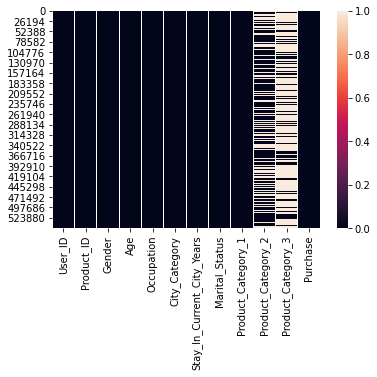

In [14]:
#plotting the heatmap for null values
sns.heatmap(data.isnull())

In [16]:
#drop the columns which are not required
data.drop(['Product_Category_3','User_ID'],axis=1,inplace=True)

In [17]:
data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [18]:
#fill na with zero
data['Product_Category_2'].fillna(0,inplace=True)

In [19]:
data['Product_Category_2'].value_counts()

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [20]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# Plotting some graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


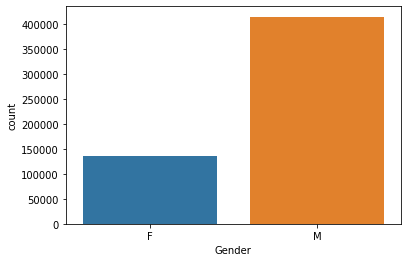

In [21]:

#count plot based on gender
sns.countplot(data['Gender'])

In [22]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,F,0-17,10,A,2,0,3,0.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,P00087842,F,0-17,10,A,2,0,12,0.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,P00285442,M,55+,16,C,4+,0,8,0.0,7969


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


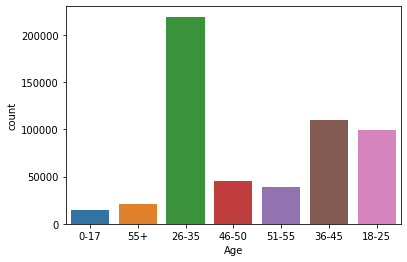

In [24]:
sns.countplot(data['Age'])

In [25]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

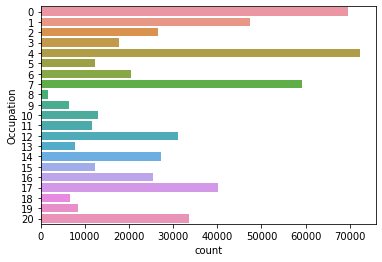

In [26]:
#count plt of occupation
sns.countplot(y=data['Occupation'])

In [27]:
#Label encoding

#for product id and age

from sklearn.preprocessing import LabelEncoder

le_encoder= LabelEncoder()

data['Product_ID']=le_encoder.fit_transform(data['Product_ID'])

data['Age']=le_encoder.fit_transform(data['Age'])



In [28]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,F,0,10,A,2,0,3,0.0,8370
1,2376,F,0,10,A,2,0,1,6.0,15200
2,852,F,0,10,A,2,0,12,0.0,1422
3,828,F,0,10,A,2,0,12,14.0,1057
4,2734,M,6,16,C,4+,0,8,0.0,7969


In [41]:
data['City_Category']=le_encoder.fit_transform(data['City_Category'])


In [43]:
data['Stay_In_Current_City_Years']=le_encoder.fit_transform(data['Stay_In_Current_City_Years'])

In [44]:
data.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Year
0,672,0,0,10,0,2,0,3,0.0,8370,2
1,2376,0,0,10,0,2,0,1,6.0,15200,2
2,852,0,0,10,0,2,0,12,0.0,1422,2
3,828,0,0,10,0,2,0,12,14.0,1057,2
4,2734,1,6,16,2,4,0,8,0.0,7969,4
5,1831,1,2,15,0,3,0,1,2.0,15227,3
6,1745,1,4,7,1,2,1,1,8.0,19215,2
7,3320,1,4,7,1,2,1,1,15.0,15854,2
8,3604,1,4,7,1,2,1,1,16.0,15686,2
9,2631,1,2,20,0,1,1,8,0.0,7871,1


In [59]:
data.drop('Stay_In_Current_City_Year',axis=1,inplace=True)

In [31]:
data['Gender']=data['Gender'].map({'F':0,'M':1})

In [60]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,0,0,10,0,2,0,3,0.0,8370
1,2376,0,0,10,0,2,0,1,6.0,15200
2,852,0,0,10,0,2,0,12,0.0,1422
3,828,0,0,10,0,2,0,12,14.0,1057
4,2734,1,6,16,2,4,0,8,0.0,7969


In [61]:
#x and y

x=data.drop('Gender',axis=1)
y=data['Gender']

In [62]:
#split the data 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [64]:
k_model=KNeighborsClassifier()

In [65]:
k_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
y_pred=k_model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7094066815738603

In [68]:
tr_acc = []
ts_acc = []

for i in range(5,17, 2):
  k_model = KNeighborsClassifier()
  k_model.fit(x_train, y_train)

  tr_pred = k_model.predict(x_train)
  ts_pred = k_model.predict(x_test)

  tr_acc.append(accuracy_score(y_train, tr_pred))
  ts_acc.append(accuracy_score(y_test, ts_pred))


In [69]:
tr_acc

[0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529]

In [70]:
ts_acc

[0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603]

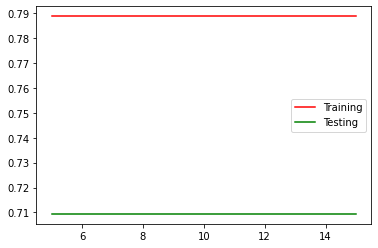

In [71]:
x_=[x for x in range(5,17,2)]
plt.plot(x_,tr_acc,label="Training",color='red')
plt.plot(x_,ts_acc,label="Testing",color='green')
plt.legend()
plt.show()